# Sustainable Energy for All

SE4ALL database supports this initiative and provides country level historical data for access to electricity and non-solid fuel; share of renewable energy in total final energy consumption by technology; and energy intensity rate of improvement.

Last update: 06/30/2018

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Data
https://databank.worldbank.org/source/sustainable-energy-for-all#

In [88]:
dfSE=pd.read_csv("c8af4998-3aa0-4d79-9215-033c6814116c_Data.csv")
display(dfSE)

,Country Name,Country Code,Time,Time Code,Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY],Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION],Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM],Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]
0,China,CHN,2016.0,YR2016,..,..,..,..,..,..,..,59.26,100.000000,100.000000,100.0
1,China,CHN,2015.0,YR2015,6.69006970167277,1398321,23.926817173663,9084482,12.4133525698911,5844158,73183146.5259,58.54,100.000000,100.000000,100.0
2,China,CHN,2014.0,YR2014,7.10422000054532,1280977,22.6091537829535,8744472,12.2238230065824,5665745,71536310.655768,57.8,99.996687,99.998489,100.0
3,China,CHN,2013.0,YR2013,7.85133380344517,1103418,20.2962273802567,8275653,11.8381669000852,5436567,69906541.019796,57.24,99.963948,99.983116,100.0
4,China,CHN,2012.0,YR2012,8.19029944077663,995264,19.9662489377563,8069989,11.9685670286267,4984731,67426526.339352,56.4,99.826197,99.916382,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Data from database: Sustainable Energy for All,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
dfSE.set_index("Country Code",inplace=True)

In [90]:
dfSE2=dfSE.iloc[:-5]
display(dfSE2.tail())

,Country Name,Time,Time Code,Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY],Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION],Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM],Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]
Country Code,,,,,,,,,,,,,,
USA,United States,1994.0,YR1994,8.35152168582419,336458,9.74723552434506,2102316,4.08864139839829,3451830,51418449.19008,..,100.0,100.0,100.0
USA,United States,1993.0,YR1993,8.52935320875437,355578,10.4843256121149,2159242,4.28152840674077,3391520,50431570.104744,..,100.0,100.0,100.0
USA,United States,1992.0,YR1992,8.61274699225872,324316,9.91611011689915,2357618,4.76308310810846,3270597,49497729.653016,..,100.0,100.0,100.0
USA,United States,1991.0,YR1991,8.74349537733587,350142,10.7574142290523,2219454,4.50791959377071,3254890,49234551.633684,..,100.0,100.0,100.0
USA,United States,1990.0,YR1990,8.66657670426795,369241,11.5286468488794,2053170,4.17546218583434,3202813,49172281.02234,..,100.0,100.0,100.0


## Techn acces for cooking

In [91]:
dfSEAccess=dfSE2[["Country Name","Time","Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]","Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]","Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]","Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]"]]
display(dfSEAccess)

,Country Name,Time,Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]
Country Code,,,,,,
CHN,China,2016.0,59.26,100.000000,100.0,100.000000
CHN,China,2015.0,58.54,100.000000,100.0,100.000000
CHN,China,2014.0,57.8,99.996687,100.0,99.998489
CHN,China,2013.0,57.24,99.963948,100.0,99.983116
CHN,China,2012.0,56.4,99.826197,100.0,99.916382
...,...,...,...,...,...,...
USA,United States,1994.0,..,100.000000,100.0,100.000000
USA,United States,1993.0,..,100.000000,100.0,100.000000
USA,United States,1992.0,..,100.000000,100.0,100.000000


In [92]:
#Cheking repeated countries
dfSEAccess['Country Repeated'] = dfSEAccess['Country Name'] == dfSEAccess['Country Name'].shift()
display(dfSEAccess)

,Country Name,Time,Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Country Repeated
Country Code,,,,,,,
CHN,China,2016.0,59.26,100.000000,100.0,100.000000,False
CHN,China,2015.0,58.54,100.000000,100.0,100.000000,True
CHN,China,2014.0,57.8,99.996687,100.0,99.998489,True
CHN,China,2013.0,57.24,99.963948,100.0,99.983116,True
CHN,China,2012.0,56.4,99.826197,100.0,99.916382,True
...,...,...,...,...,...,...,...
USA,United States,1994.0,..,100.000000,100.0,100.000000,True
USA,United States,1993.0,..,100.000000,100.0,100.000000,True
USA,United States,1992.0,..,100.000000,100.0,100.000000,True


In [93]:
#Saving non-repeated countries
NRep=[]
i=0
for Named in dfSEAccess["Country Repeated"]:
    if  (dfSEAccess.iloc[i]["Country Repeated"] == False):
        NRep.append(dfSEAccess.iloc[i]["Country Name"])
    i=i+1

print(NRep)

['China', 'India', 'United States']


In [94]:
#Saving non-repeated years
yearsBlock=[]
yearsDesc=[]
yearsAsc=[]

#Adding all years in list
for year in dfSEAccess["Time"]:
    yearsBlock.append(int(year))    

#Creating a list with years not repeated
for year2 in yearsBlock:
    if year2 not in yearsDesc:
        yearsDesc.append(year2)

yearsAsc=yearsDesc[::-1]

print(yearsDesc, yearsAsc)

[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990] [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [52]:
# Random year by user
ranYear=input("Enter any year between 2000 and 2016")

try:
    number=int(ranYear)
    if (number>2000) & (number<2016):
        print("Success",ranYear)
    else:
        print("Fuera de límite")
except ValueError:
    print(f"try a year again")

Enter any year between 2000 and 2016 2009


Success 2009


In [24]:
#Y values for series
def Cooking(yearCooking):
    
    lbACook="Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]"
    heightCook=[]
    
    i=0
    for year in dfSEAccess["Time"]:
        if  (year == yearCooking):
            try:
                number=float(dfSEAccess.iloc[i][lbACook])
            except ValueError:
                number=0 
            heightCook.append(number)
        i=i+1

    return heightCook


In [26]:
#Filtering years for series
firstYear=min(yearsAsc)
lastYear=max(yearsAsc)


for yearCooking in yearsAsc:
    if  (yearCooking == firstYear):
        heightFCook=Cooking(yearCooking)
        #No info for 10 years
        while all (x==0 for x in heightFCook):
            yearCooking=yearCooking+1
            heightFCook=Cooking(yearCooking)
        firstYear=yearCooking
        print(firstYear)
    elif (yearCooking == lastYear):
        heightLCook=Cooking(yearCooking)
    elif (int(yearCooking) == int(ranYear)):
        heightRCook=Cooking(yearCooking)
        
print(heightFCook,heightLCook,heightRCook)

2000
2000
[46.78, 22.15, 100.0] [59.26, 41.04, 100.0] [54.91, 34.4, 100.0]


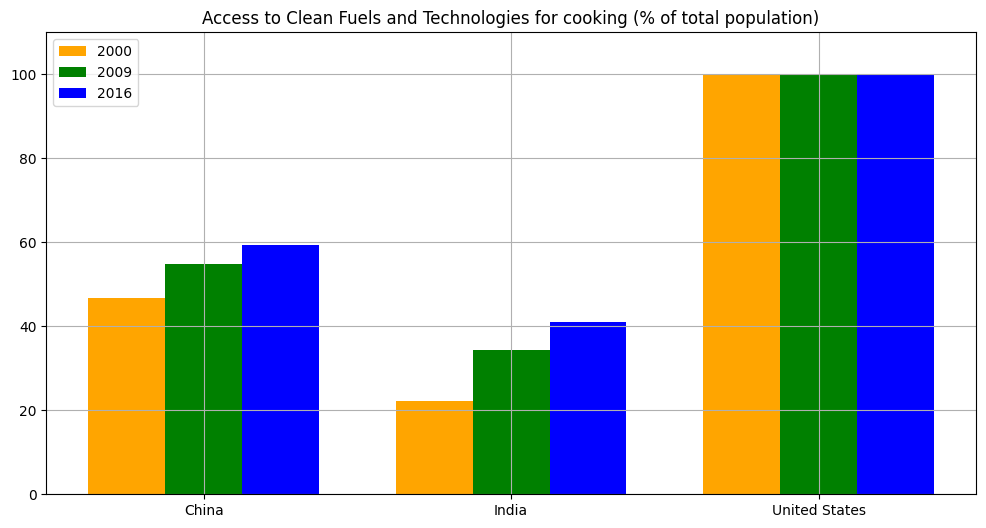

In [59]:
#Barplot
plt.figure(figsize=(12,6))
barWidth=0.25
plt.grid()
barIndex=np.arange(len(NRep))
plt.bar(barIndex,heightFCook,width=barWidth,label=firstYear,color="orange")
plt.bar(barIndex+barWidth,heightRCook,width=barWidth,label=ranYear,color="green")
plt.bar(barIndex+2*barWidth,heightLCook,width=barWidth,label=lastYear,color="blue")
plt.title("Access to Clean Fuels and Technologies for cooking (% of total population)")
plt.ylim(0,110)
plt.xticks(barIndex+barWidth,NRep)
plt.legend()
plt.show()

## Energy intensity level of primary energy

In [95]:
dfEIntensity=dfSE2[['Country Name',"Time","Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]"]]
display(dfEIntensity)
dfEIntensity.info()

,Country Name,Time,Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]
Country Code,,,
CHN,China,2016.0,..
CHN,China,2015.0,6.69006970167277
CHN,China,2014.0,7.10422000054532
CHN,China,2013.0,7.85133380344517
CHN,China,2012.0,8.19029944077663
...,...,...,...
USA,United States,1994.0,8.35152168582419
USA,United States,1993.0,8.52935320875437
USA,United States,1992.0,8.61274699225872


<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, CHN to USA
Data columns (total 3 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   Country Name                                                                               81 non-null     object 
 1   Time                                                                                       81 non-null     float64
 2   Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]  81 non-null     object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [96]:
#Y Values for series
def primEnergy(countryName):

    lbEIntensity="Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]"
    yValues=[]
    
    i=0
    for country2 in dfEIntensity.iloc[:,0]:
        if  (country2 == countryName):
            try:
                number=float(dfEIntensity.iloc[i][lbEIntensity])
            except ValueError:
                number=float(dfEIntensity.iloc[i+1][lbEIntensity])  
            yValues.append(number)
        i=i+1

    return yValues

In [97]:
#Series of each country
for countryName in NRep:
    match countryName:
        case "China":
            primEChDesc=primEnergy(countryName)
        case "India":
            primEInDesc=primEnergy(countryName)
        case "United States":
            primEUsDesc=primEnergy(countryName)

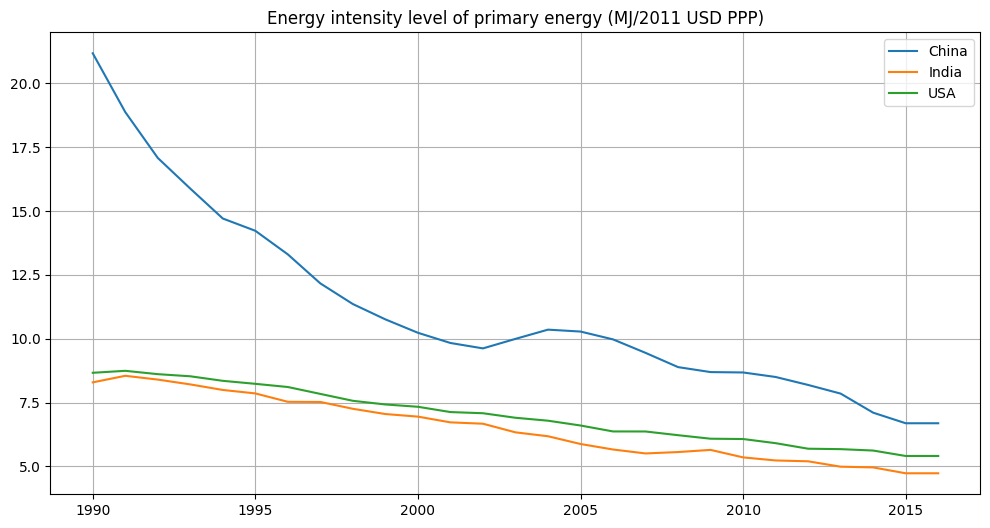

In [98]:
#Plot
plt.figure(figsize=(12,6))

plt.plot(yearsDesc,primEChDesc,label="China")
plt.plot(yearsDesc,primEInDesc,label="India")
plt.plot(yearsDesc,primEUsDesc,label="USA")

plt.legend()
plt.grid()

xvalues=np.arange(1990,2020,5)
plt.title("Energy intensity level of primary energy (MJ/2011 USD PPP)")

plt.xticks(xvalues)
plt.show()

In [99]:
#Ascending values for prediction model
primEChAsc=primEChDesc[::-1]
primEInAsc=primEInDesc[::-1]
primEUsAsc=primEUsDesc[::-1]
print(primEChAsc,primEInAsc,primEUsAsc)

[21.1794428300169, 18.877110712943, 17.0805466608847, 15.8797456205743, 14.7079958674348, 14.2276292342512, 13.3030465045035, 12.1664364132538, 11.3579595075545, 10.7579613765602, 10.2330505139265, 9.83358330647969, 9.62184205654561, 9.9942099834131, 10.3559973757278, 10.2813087845064, 9.97448941321124, 9.44675565223316, 8.88879012128668, 8.69387284061915, 8.67917853685099, 8.50231950127344, 8.19029944077663, 7.85133380344517, 7.10422000054532, 6.69006970167277, 6.69006970167277] [8.2915979089233, 8.54836655208097, 8.40018852696283, 8.21116167819759, 7.99411301080985, 7.85816030317115, 7.53016367474512, 7.52418202136383, 7.25603779427374, 7.05054707851972, 6.94959487076476, 6.72480637599239, 6.67200102251513, 6.33392172930991, 6.18110787146406, 5.87751946572999, 5.66184904777442, 5.50764929853643, 5.56214240997603, 5.64671193201939, 5.35317924225662, 5.23298571103505, 5.19964331645046, 4.98862544005017, 4.96014949895526, 4.73091044855314, 4.73091044855314] [8.66657670426795, 8.74349537

In [124]:
data = pd.DataFrame({'Year': yearsAsc, 'ChinaASC': primEChAsc,'IndiaASC':primEInAsc,'UsaASC':primEUsAsc})
display(data)

,Year,ChinaASC,IndiaASC,UsaASC
0,1990,21.179443,8.291598,8.666577
1,1991,18.877111,8.548367,8.743495
2,1992,17.080547,8.400189,8.612747
3,1993,15.879746,8.211162,8.529353
4,1994,14.707996,7.994113,8.351522
5,1995,14.227629,7.858160,8.234135
6,1996,13.303047,7.530164,8.109278
7,1997,12.166436,7.524182,7.839134
8,1998,11.357960,7.256038,7.569026
9,1999,10.757961,7.050547,7.425803


🔹 ARIMA para 2020: 7.46 MJ/USD


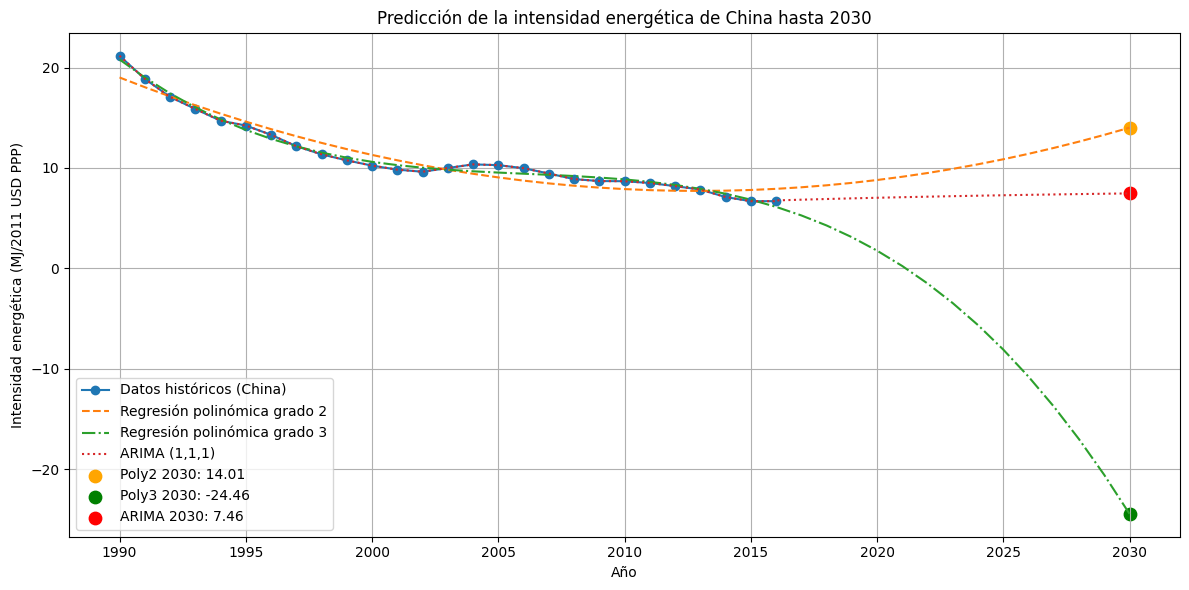

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.arima.model import ARIMA

# ========================
# 1. Regresión Polinómica
# ========================
X = data[['Year']]
y_CHN = data['ChinaASC']
y_IND = data['IndiaASC']
y_USA = data['UsaASC']


# Grado 2
poly2_CHN = PolynomialFeatures(degree=2)
X_poly2_CHN = poly2_CHN.fit_transform(X)
model_poly2_CHN = LinearRegression().fit(X_poly2_CHN, y_CHN)

# Grado 3
poly3_CHN = PolynomialFeatures(degree=3)
X_poly3_CHN = poly3_CHN.fit_transform(X)
model_poly3_CHN = LinearRegression().fit(X_poly3_CHN, y_CHN)



# Predicción para un rango más amplio hasta 2030
future_years = np.arange(1990, 2031).reshape(-1, 1)
future_poly2_CHN = poly2_CHN.transform(future_years)
future_poly3_CHN = poly3_CHN.transform(future_years)

pred_poly2_CHN = model_poly2_CHN.predict(future_poly2)
pred_poly3_CHN = model_poly3_CHN.predict(future_poly3)



# ========== ARIMA ==========
model_arima_CHN = ARIMA(y_CHN, order=(1, 1, 1))
model_arima_fit_CHN = model_arima_CHN.fit()

forecast_arima_CHN = model_arima_fit_CHN.forecast(steps=15)
arima_years = np.arange(2016, 2031)
arima_full_years = np.concatenate([yearsAsc, arima_years])
arima_full_preds = np.concatenate([y_CHN, forecast_arima_CHN])


# Predicciones específicas para 2030
pred_poly2_2030_CHN = pred_poly2_CHN[-1]
pred_poly3_2030_CHN = pred_poly3_CHN[-1]
pred_arima_2030_CHN = forecast_arima_CHN.iloc[-1]
# ========================
# Resultados
# ========================
print(f"🔹 ARIMA para 2020: {pred_arima_2030_CHN:.2f} MJ/USD")


# ========== Plot ==========
plt.figure(figsize=(12, 6))
plt.plot(yearsAsc, y_CHN, label='Datos históricos (China)', marker='o')
plt.plot(future_years, pred_poly2_CHN, label='Regresión polinómica grado 2', linestyle='--')
plt.plot(future_years, pred_poly3_CHN, label='Regresión polinómica grado 3', linestyle='-.')
plt.plot(arima_full_years, arima_full_preds, label='ARIMA (1,1,1)', linestyle=':')


# Marcar el punto 2030
plt.scatter([2030], [pred_poly2_2030_CHN], color='orange', s=80, label=f'Poly2 2030: {pred_poly2_2030_CHN:.2f}')
plt.scatter([2030], [pred_poly3_2030_CHN], color='green', s=80, label=f'Poly3 2030: {pred_poly3_2030_CHN:.2f}')
plt.scatter([2030], [pred_arima_2030_CHN], color='red', s=80, label=f'ARIMA 2030: {pred_arima_2030_CHN:.2f}')

plt.title('Predicción de la intensidad energética de China hasta 2030')
plt.xlabel('Año')
plt.ylabel('Intensidad energética (MJ/2011 USD PPP)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [85]:
# Random year by user
ranYear2=input("Enter any year after 2016 to obtain a prediction")

try:
    number=int(ranYear2)
    if (number>2016) & (number<2100):
        print("Success",ranYear2)
    else:
        print("Fuera de límite")
except ValueError:
    print(f"try a year again")

Enter any year before 2016 to obtain a prediction 2080


Success 2080
